In [8]:
from ThymeBoost import ThymeBoost as tb
import seaborn as sns
sns.set_style('darkgrid')

Simple example with yahoo finance grabbing microsoft prices from yahoo finance api documentation. There are gaps in the index so we are just resetting the index to allow fitting. Better to fill gaps or do something else!

In [2]:
import yfinance as yf
msft = yf.Ticker("MSFT")

# get historical market data
hist = msft.history(period="max")

current_df = hist.iloc[-900:-100].reset_index()
future_df = hist.iloc[-100:].reset_index()

y_train = current_df['High']
X_train = current_df[['Volume', 'Stock Splits']]

y_test = future_df['High']
X_test = future_df[['Volume', 'Stock Splits']]

First we will do a simple ARIMA with an order of (2, 1, 2) passed 

In [5]:
boosted_model = tb.ThymeBoost(verbose=0)
output = boosted_model.fit(y_train,
                           trend_estimator='arima',
                           arima_order=(2,1,2),
                           global_cost='mse',
                           fit_type='global',
                           )
predicted_output = boosted_model.predict(output, 100)

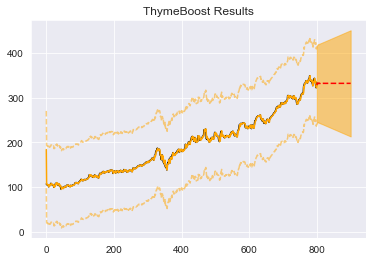

In [9]:
boosted_model.plot_results(output, predicted_output)

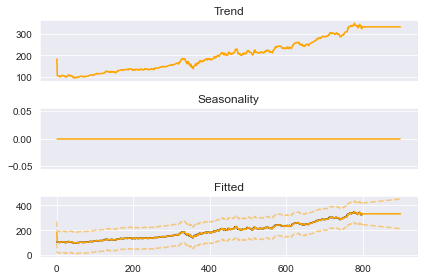

In [10]:
boosted_model.plot_components(output, predicted_output)

Next we will try to combine ARIMA with a simple linear regression. Notice how we pass the trend estimator now as a list!

In [11]:
boosted_model = tb.ThymeBoost(verbose=0)
output = boosted_model.fit(y_train,
                           trend_estimator=['linear', 'arima'],
                           arima_order=(2,1,2),
                           global_cost='mse',
                           fit_type='global',
                           )
predicted_output = boosted_model.predict(output, 100)


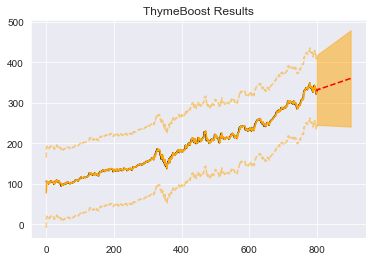

In [12]:
boosted_model.plot_results(output, predicted_output)

And finally with PmdArima's Auto-Arima implementation by changing the order to 'auto':

In [15]:
boosted_model = tb.ThymeBoost(verbose=1)
output = boosted_model.fit(y_train,
                           trend_estimator=['linear', 'arima'],
                           arima_order='auto',
                           global_cost='mse',
                           fit_type='global',
                           )
predicted_output = boosted_model.predict(output, 100)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
None
cost: 4604.647467389097
********** Round 2 **********
Using Split: None
Fitting global with trend model:
linear((1, None))
seasonal model:
None
cost: 195.6395594787734
********** Round 3 **********
Using Split: None
Fitting global with trend model:
arima(auto)
seasonal model:
None
cost: 8.39198629538504
Boosting Terminated 
Using round 3


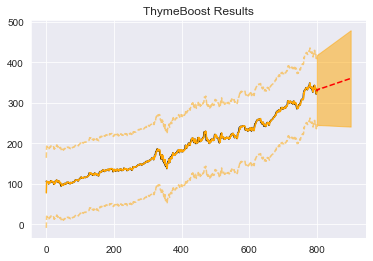

In [16]:
boosted_model.plot_results(output, predicted_output)